In [2]:
import os
print(os.getcwd())
os.chdir('/home/hyeryungson/nlp-study/torch-tutorial')
import os
print(os.getcwd())
import time

/home/hyeryungson/nlp-study/torch-tutorial
/home/hyeryungson/nlp-study/torch-tutorial


# Intro to Autograd
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [6]:
import torch
from torchvision.models import resnet18#, ResNet18_Weights
model=resnet18()#weights=ResNet18_Weights.DEFAULT)


In [20]:
data = torch.rand(1,3,64,64)
labels=torch.rand(1,1000)

In [21]:
prediction=model(data)

In [22]:
loss = (prediction - labels).sum()
loss.backward()

In [30]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [31]:
optim.step() #gradient descent

In [33]:
optim.zero_grad()

# Neural Networks
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])


In [2]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0152,  0.0161, -0.1561,  0.0012,  0.1269,  0.0728, -0.0261,  0.1413,
         -0.0011, -0.0067]], grad_fn=<AddmmBackward0>)


In [3]:
net.zero_grad() ## 이게 중요하구나, accumulate이 계속 되지 않게 하려면.
out.backward(torch.randn(1, 10))

In [10]:
print(net.conv1.weight.grad)
print(net.conv1.bias.grad)

tensor([[[[ 0.0380,  0.0485,  0.0154, -0.0378,  0.0111],
          [-0.0523, -0.1139,  0.0486, -0.0508, -0.0211],
          [-0.0104,  0.0174, -0.0728,  0.0481, -0.0273],
          [-0.0088, -0.0014, -0.1128, -0.0786, -0.0128],
          [ 0.0734, -0.0229, -0.0137, -0.1058, -0.0006]]],


        [[[ 0.0402, -0.0604,  0.0780,  0.0075, -0.0626],
          [ 0.0556,  0.0590, -0.0917, -0.0259, -0.0595],
          [ 0.0241, -0.1000, -0.0257, -0.0071, -0.0009],
          [ 0.0486, -0.0750, -0.0061, -0.0220, -0.0829],
          [ 0.0389, -0.0174, -0.1029,  0.0840,  0.0003]]],


        [[[-0.1240,  0.0535,  0.0236, -0.0092,  0.0429],
          [ 0.0371, -0.0003,  0.1430, -0.1066,  0.0736],
          [ 0.1817,  0.0165,  0.0019, -0.0660, -0.1260],
          [ 0.0244, -0.0764, -0.0616,  0.2078,  0.1231],
          [ 0.0053, -0.0650, -0.0441, -0.0403,  0.1181]]],


        [[[-0.1205, -0.0224,  0.1363,  0.1087,  0.0549],
          [-0.0496, -0.0793,  0.0711, -0.0792,  0.0529],
          [-0.0147,

In [11]:
# loss function
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.3273, grad_fn=<MseLossBackward0>)


In [21]:
fn = loss.grad_fn
print(fn)
while fn.next_functions is not None:
    print(fn.next_functions)
    fn = fn.next_functions[0][0]
    print(fn)

In [22]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


In [23]:
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0028, -0.0087, -0.0029, -0.0013,  0.0116, -0.0033])


In [24]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Training a classifier

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [25]:
import torch
import torchvision
import torchvision.transforms as transforms

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


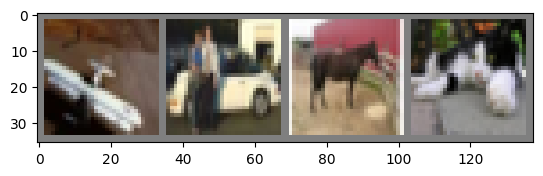

plane car   horse cat  


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [28]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.141
[1,  4000] loss: 1.813
[1,  6000] loss: 1.644
[1,  8000] loss: 1.565
[1, 10000] loss: 1.524
[1, 12000] loss: 1.480
[2,  2000] loss: 1.419
[2,  4000] loss: 1.358
[2,  6000] loss: 1.340
[2,  8000] loss: 1.332
[2, 10000] loss: 1.307
[2, 12000] loss: 1.282
Finished Training


In [30]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

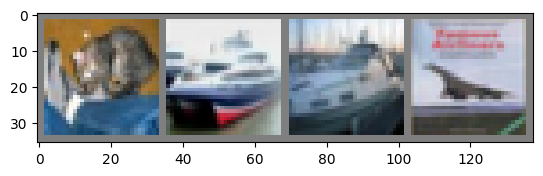

GroundTruth:  cat   ship  ship  plane


In [41]:
dataiter = iter(testloader)
images, labels=next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [35]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [42]:
outputs = net(images)

In [43]:
outputs.shape

torch.Size([4, 10])

In [44]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


In [45]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [48]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 59.0 %
Accuracy for class: car   is 73.5 %
Accuracy for class: bird  is 43.3 %
Accuracy for class: cat   is 32.9 %
Accuracy for class: deer  is 27.6 %
Accuracy for class: dog   is 30.3 %
Accuracy for class: frog  is 81.1 %
Accuracy for class: horse is 57.1 %
Accuracy for class: ship  is 73.1 %
Accuracy for class: truck is 70.2 %


### On GPU

In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [50]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
# Remember that you will have to send the inputs and targets at every step to the GPU too:
inputs, labels = data[0].to(device), data[1].to(device)

In [56]:
start_time=time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data # <- previously
        # Remember that you will have to send the inputs and targets at every step to the GPU too:
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
print('Elapsed Time: ', time.time()-start_time)

[1,  2000] loss: 1.241
[1,  4000] loss: 1.219
[1,  6000] loss: 1.208
[1,  8000] loss: 1.221
[1, 10000] loss: 1.240
[1, 12000] loss: 1.246
[2,  2000] loss: 1.238
[2,  4000] loss: 1.229
[2,  6000] loss: 1.246
[2,  8000] loss: 1.210
[2, 10000] loss: 1.231
[2, 12000] loss: 1.226
Finished Training
Elapsed Time:  88.10224628448486


In [60]:
# del dataiter

NameError: name 'dataiter' is not defined